<a href="https://colab.research.google.com/github/Alerakha/05_Aleron-Tsaqif-Rakha_PCVK_Ganjil_2024/blob/main/Pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


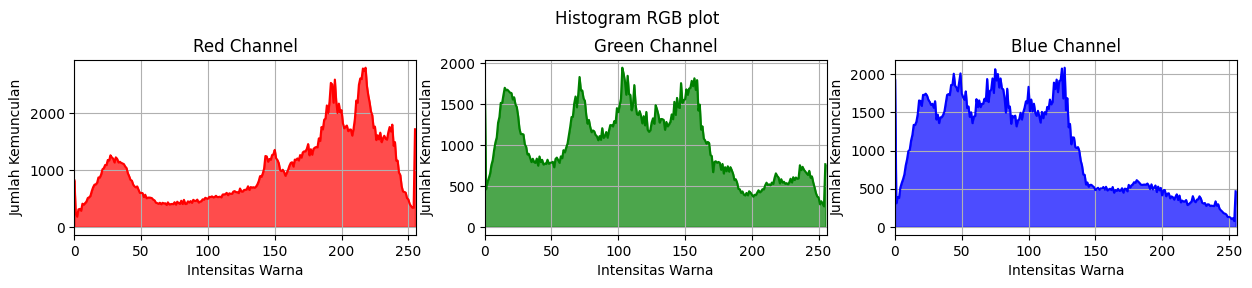

In [1]:
# @title PERTEMUAN 6

# 1 BUAT FILE WEEK 6 / PERTEMUAN 6
# 2 IMPORT LIBRARY YANG DIGUNAKAN UNTUK PRAKTIKUM HARI INI
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# cv2_imshow(image_rgb)

'''
# Menghitung histogram
# Menghitung jumlah kemunculan setiap piksel warna
colors = ('b', 'g', 'r')  # warna BGR
plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    histogram = cv.calcHist([image], [i], None, [256], [0, 256])  # Menghitung histogram
    plt.plot(histogram, color=color)  # Menggambar histogram
    plt.xlim([0, 256])  # Batas sumbu x

plt.title('Histogram Citra')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.grid()
plt.show()
'''
# MEMBUAT HISTOGRAM WARNA UNTUK CITRA/GAMBAR
# Menghitung histogram dengan tampilan terpisah untuk setiap channel warna
colors = ('r', 'g', 'b')  # warna RGB
channel_names = ['Red', 'Green', 'Blue']

plt.figure(figsize=(15, 5))
for i, color in enumerate(colors):
    plt.subplot(2, 3, i + 1)  # Membuat subplot untuk setiap channel
    histogram = cv.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.fill_between(range(256), histogram[:,0], color=color, alpha=0.7)
    plt.plot(histogram, color=color)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([0, 256])
    plt.grid()

plt.suptitle('Histogram RGB plot')
plt.show()


In [2]:
# 4 MEMBUAT HISTOGRAM DENGAN MENGGUNAKAN LIBARY OLEH NumPy "histogram"
# Menghitung histogram menggunakan numpy
hist_red, bins_red = np.histogram(image[:, :, 2], bins=256, range=(0, 256))
hist_green, bins_green = np.histogram(image[:, :, 1], bins=256, range=(0, 256))
hist_blue, bins_blue = np.histogram(image[:, :, 0], bins=256, range=(0, 256))

# Menampilkan histogram sebagai teks (hanya menghitung frekuensi)
print("Histogram Red Channel: ", hist_red)
print("Histogram Green Channel: ", hist_green)
print("Histogram Blue Channel: ", hist_blue)



Histogram Red Channel:  [ 816  230  178  305  314  282  405  389  415  443  505  517  543  628
  694  739  745  774  866  866  918 1009 1029 1084 1085 1173 1165 1255
 1218 1197 1129 1219 1193 1129 1142 1123 1113 1101 1058 1032  942  887
  822  811  740  709  692  709  649  595  593  592  522  563  501  512
  513  510  503  476  464  423  415  404  422  395  421  410  413  383
  429  393  397  401  398  431  389  440  416  403  457  399  473  399
  405  447  427  451  421  474  454  454  477  426  442  449  482  477
  509  498  491  525  522  534  516  524  544  521  523  529  517  566
  569  572  596  555  588  579  579  618  626  608  608  591  672  620
  619  646  649  658  711  647  697  689  694  686  706  744  802  889
  877  933 1019 1243 1235 1143 1190 1178 1259 1273 1350 1202 1172 1117
  995  978 1002  960  895  948 1001 1073 1122 1133 1057 1179 1175 1200
 1165 1259 1215 1306 1324 1325 1367 1452 1255 1362 1266 1367 1389 1400
 1396 1552 1507 1751 1711 1878 1902 2130 1993 2197 25

Output yang dikeluarkan dengan library NumPy histogram merupakan sebuah array panjang.

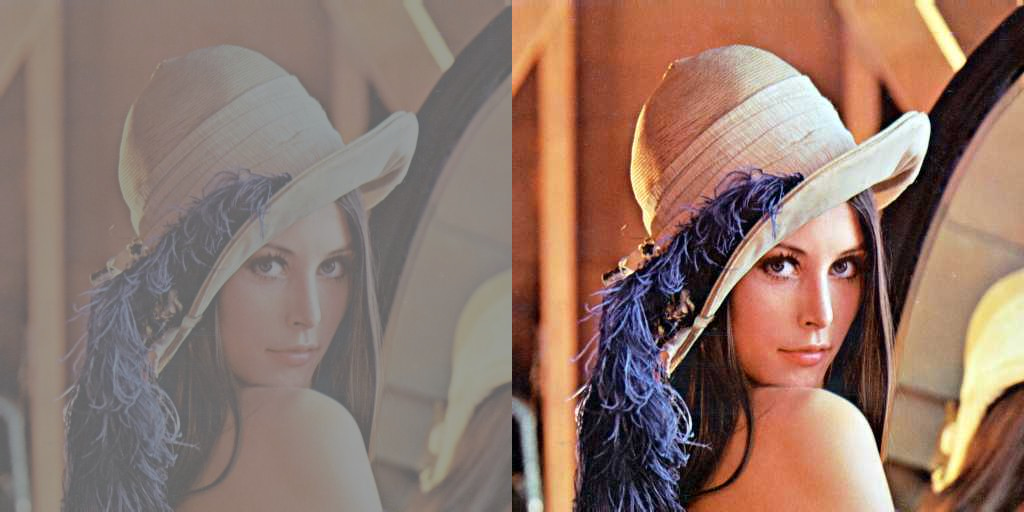

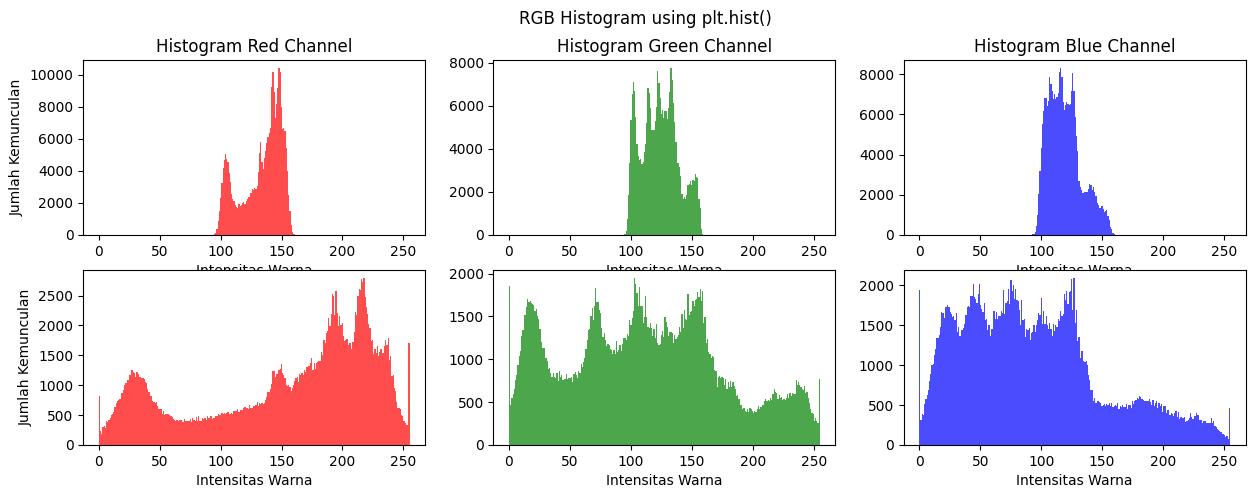

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
image2 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
image_combine = cv.hconcat([image2, image])

# Menampilkan gambar
cv2_imshow(image_combine)

# Konversi dari BGR ke RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image2_rgb = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

# Ekstraksi channel warna (R, G, B)
r_channel = image_rgb[:, :, 0].ravel()  # Channel merah
g_channel = image_rgb[:, :, 1].ravel()  # Channel hijau
b_channel = image_rgb[:, :, 2].ravel()  # Channel biru

r2_channel = image2_rgb[:, :, 0].ravel()  # Channel merah
g2_channel = image2_rgb[:, :, 1].ravel()  # Channel hijau
b2_channel = image2_rgb[:, :, 2].ravel()  # Channel biru

# Membuat histogram dengan plt.hist()
plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
plt.hist(r2_channel, bins=256,range=(0,255), color='red', alpha=0.7)  # Histogram untuk channel merah
plt.title('Histogram Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 2)
plt.hist(g2_channel, bins=256,range=(0,255), color='green', alpha=0.7)  # Histogram untuk channel hijau
plt.title('Histogram Green Channel')
plt.xlabel('Intensitas Warna')

plt.subplot(2, 3, 3)
plt.hist(b2_channel, bins=256,range=(0,255), color='blue', alpha=0.7)  # Histogram untuk channel biru
plt.title('Histogram Blue Channel')
plt.xlabel('Intensitas Warna')

plt.subplot(2, 3, 4)
plt.hist(r_channel, bins=256,range=(0,255), color='red', alpha=0.7)  # Histogram untuk channel merah
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 5)
plt.hist(g_channel, bins=256,range=(0,255), color='green', alpha=0.7)  # Histogram untuk channel hijau
plt.xlabel('Intensitas Warna')

plt.subplot(2, 3, 6)
plt.hist(b_channel, bins=256,range=(0,255), color='blue', alpha=0.7)  # Histogram untuk channel biru
plt.xlabel('Intensitas Warna')

plt.suptitle('RGB Histogram using plt.hist()')
plt.show()


<ipython-input-8-3f3665e76078>:106: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


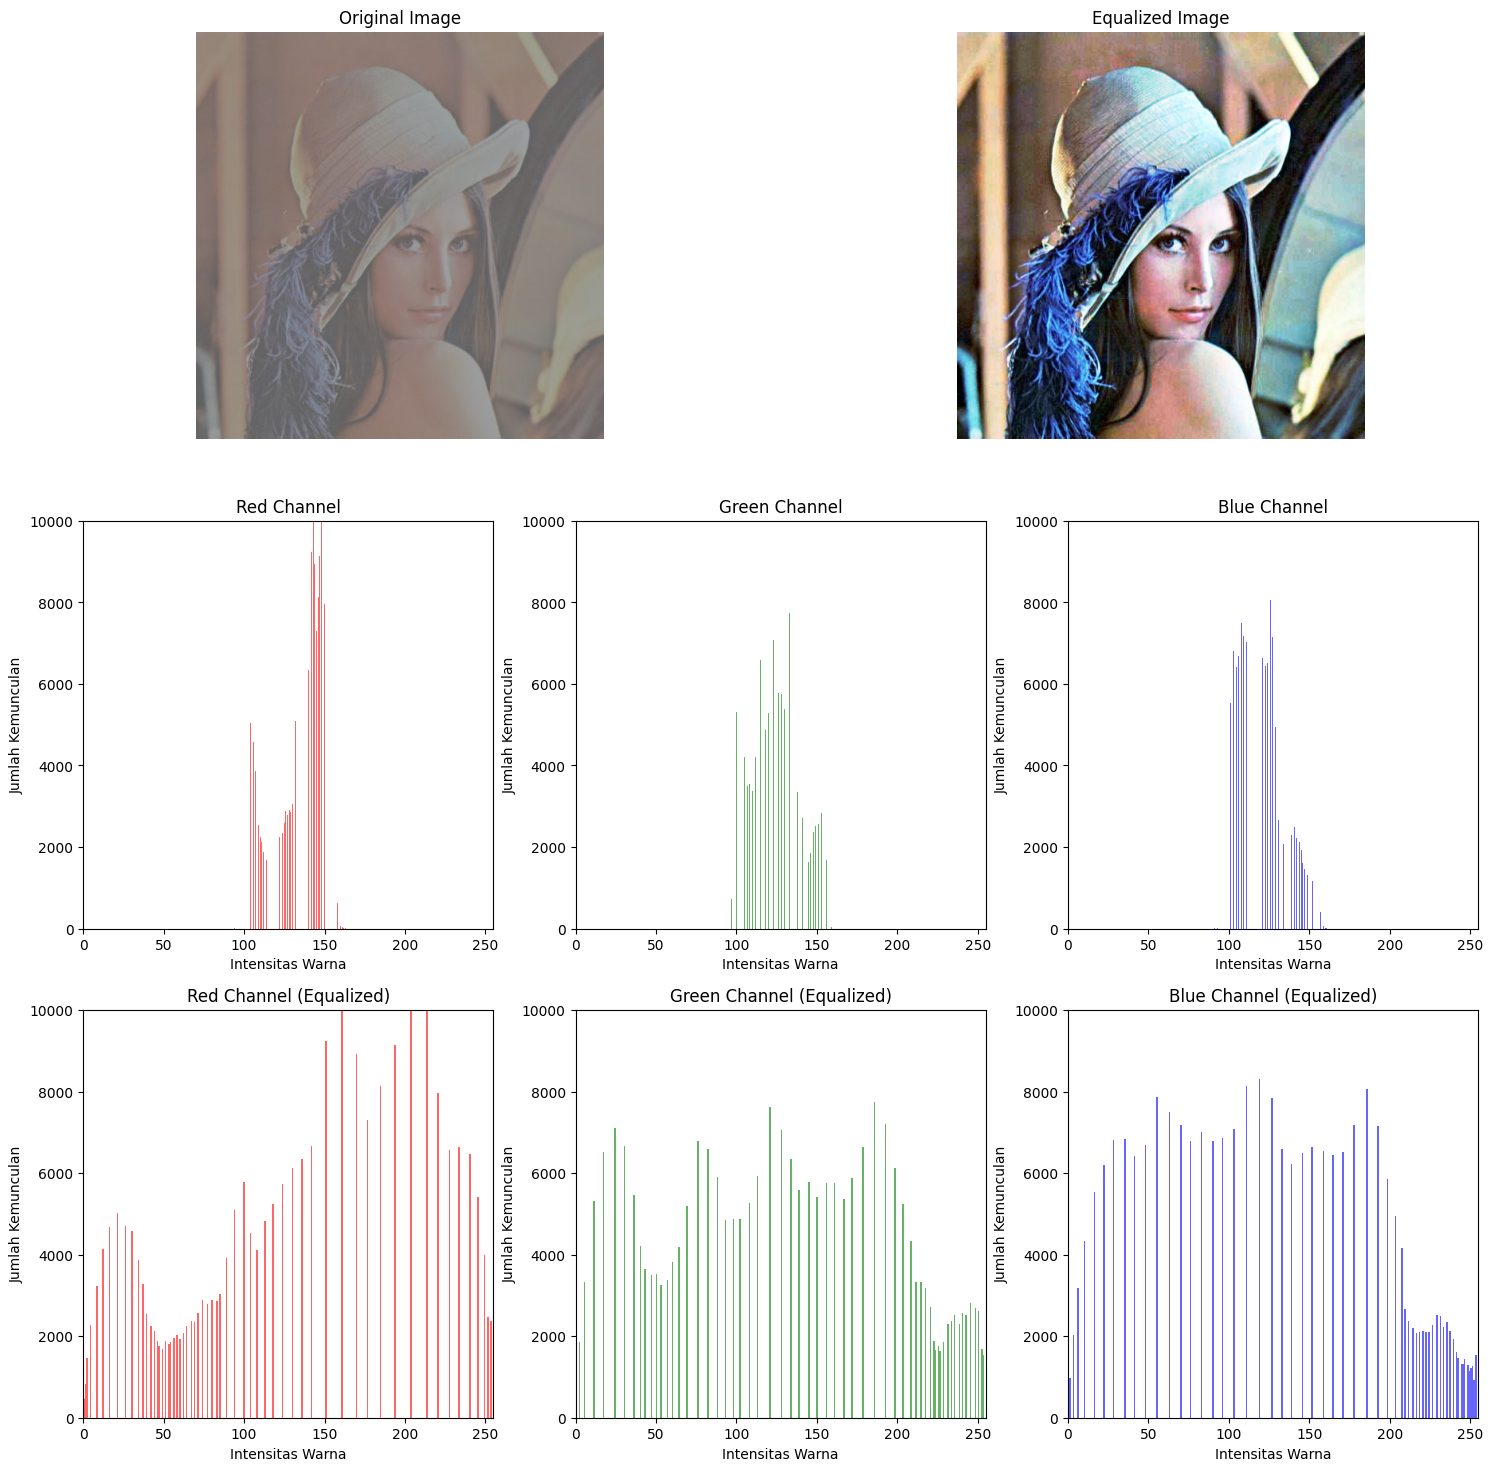

In [8]:
# 5 MEMBUAT HISTOGRAM CITRA histogram equalization
from skimage import io
img_path = "/content/drive/MyDrive/PCVK/Images/lena_lc.jpg"
# input image
img = io.imread(img_path)

# Menghitung jumlah kemunculan setiap pixel warna (frekuensi)
# Untuk citra RGB, kita akan menghitung frekuensi untuk setiap channel
red_freq, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
green_freq, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
blue_freq, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

# Menghitung penjumlahan kumulatif dari frekuensi
red_cumulative = np.cumsum(red_freq)
green_cumulative = np.cumsum(green_freq)
blue_cumulative = np.cumsum(blue_freq)

# Normalisasi kumulatif frekuensi
num_pixels = img.shape[0] * img.shape[1]
red_cumulative_normalized = (red_cumulative / num_pixels) * 255
green_cumulative_normalized = (green_cumulative / num_pixels) * 255
blue_cumulative_normalized = (blue_cumulative / num_pixels) * 255

# Implementasi rumus histogram equalization (skala warna)
red_equalized = red_cumulative_normalized[img[:, :, 0]]
green_equalized = green_cumulative_normalized[img[:, :, 1]]
blue_equalized = blue_cumulative_normalized[img[:, :, 2]]

# Membangun citra hasil histogram equalization
equalized_img = np.zeros_like(img)
equalized_img[:, :, 0] = red_equalized.astype(np.uint8)
equalized_img[:, :, 1] = green_equalized.astype(np.uint8)
equalized_img[:, :, 2] = blue_equalized.astype(np.uint8)

# Menampilkan hasil
plt.figure(figsize=(18, 18))

# Menampilkan gambar sebelum dan sesudah histogram equalization di baris pertama
plt.subplot(3, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.imshow(equalized_img)
plt.axis('off')
plt.title('Equalized Image')

# Membuat histogram untuk gambar asli di baris kedua
plt.subplot(3, 3, 4)  # Kolom 1
plt.hist(img[:, :, 0].ravel(), bins=256, color='red', alpha=0.6)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)  # Mengatur rentang sumbu x
plt.ylim(0, 10000)
plt.margins(0.5)  # Mengatur rentang sumbu y

plt.subplot(3, 3, 5)  # Kolom 2
plt.hist(img[:, :, 1].ravel(), bins=256, color='green', alpha=0.6)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(3, 3, 6)  # Kolom 3
plt.hist(img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.6)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

# Membuat histogram untuk gambar yang telah diequalisasi di baris ketiga
plt.subplot(3, 3, 7)  # Kolom 1
plt.hist(equalized_img[:, :, 0].ravel(), bins=256, color='red', alpha=0.6)
plt.title('Red Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(3, 3, 8)  # Kolom 2
plt.hist(equalized_img[:, :, 1].ravel(), bins=256, color='green', alpha=0.6)
plt.title('Green Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

plt.subplot(3, 3, 9)  # Kolom 3
plt.hist(equalized_img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.6)
plt.title('Blue Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)
plt.margins(0.5)

# Menyesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan hasil
plt.show()

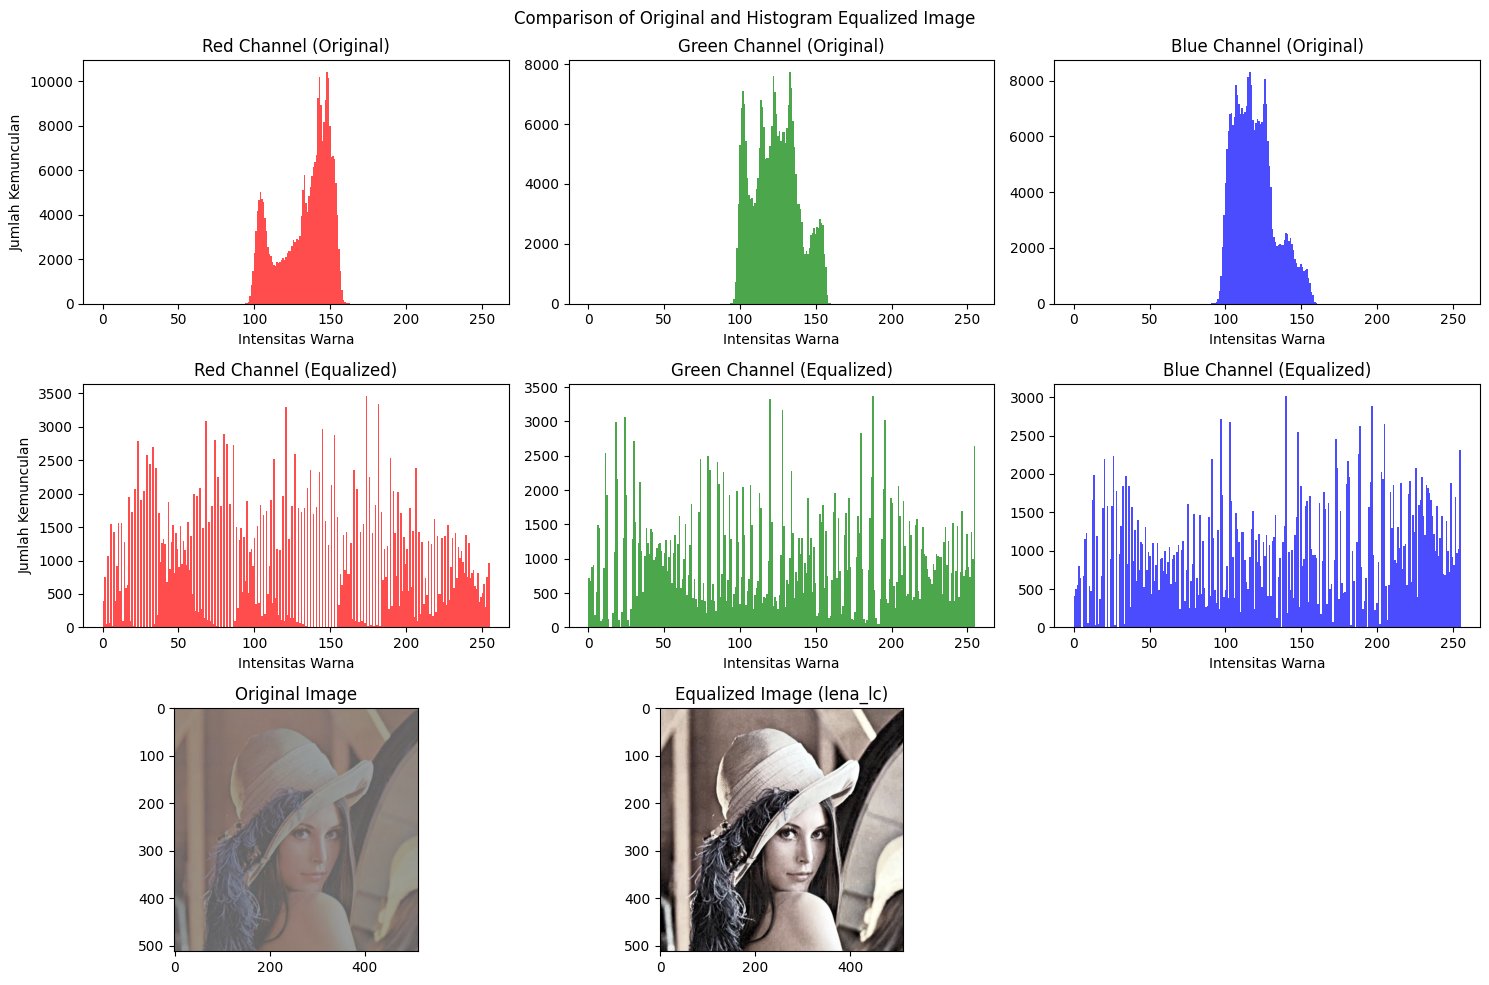

In [7]:
# 6 MEMBUAT HISTOGRAM CITRA NAMUN DENGAN MENGGUNAKAN cv.eqalizerHist
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar asli dan gambar lena_lc
image2 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Konversi dari BGR ke YUV untuk gambar lena_lc untuk menerapkan Histogram Equalization
image2_yuv = cv.cvtColor(image2, cv.COLOR_BGR2YUV)

# Terapkan Histogram Equalization hanya pada channel Y (luminance) pada gambar lena_lc
image2_yuv[:, :, 0] = cv.equalizeHist(image2_yuv[:, :, 0])

# Konversi kembali dari YUV ke RGB setelah equalization
image2_eq = cv.cvtColor(image2_yuv, cv.COLOR_YUV2BGR)

# Ekstraksi channel warna (R, G, B) untuk gambar asli (image) dan gambar setelah equalization (image2_eq)
r_channel = image2[:, :, 2].ravel()  # Channel merah gambar asli
g_channel = image2[:, :, 1].ravel()  # Channel hijau gambar asli
b_channel = image2[:, :, 0].ravel()  # Channel biru gambar asli

r2_eq_channel = image2_eq[:, :, 0].ravel()  # Channel merah gambar lena_lc setelah equalization
g2_eq_channel = image2_eq[:, :, 1].ravel()  # Channel hijau gambar lena_lc setelah equalization
b2_eq_channel = image2_eq[:, :, 2].ravel()  # Channel biru gambar lena_lc setelah equalization

# Membuat perbandingan histogram dengan plt.hist() dengan range tetap (0-255)
plt.figure(figsize=(15, 10))

# Histogram untuk gambar asli (image)
plt.subplot(3, 3, 1)
plt.hist(r_channel, bins=256, range=(0, 255), color='red', alpha=0.7)
plt.title('Red Channel (Original)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(3, 3, 2)
plt.hist(g_channel, bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title('Green Channel (Original)')
plt.xlabel('Intensitas Warna')

plt.subplot(3, 3, 3)
plt.hist(b_channel, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title('Blue Channel (Original)')
plt.xlabel('Intensitas Warna')

# Histogram untuk gambar lena_lc setelah Histogram Equalization (image2_eq)
plt.subplot(3, 3, 4)
plt.hist(r2_eq_channel, bins=256, range=(0, 255), color='red', alpha=0.7)
plt.title('Red Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(3, 3, 5)
plt.hist(g2_eq_channel, bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title('Green Channel (Equalized)')
plt.xlabel('Intensitas Warna')

plt.subplot(3, 3, 6)
plt.hist(b2_eq_channel, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title('Blue Channel (Equalized)')
plt.xlabel('Intensitas Warna')

# Menampilkan kedua gambar untuk perbandingan visual
plt.subplot(3, 3, 7)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))  # Gambar asli
plt.title('Original Image')

plt.subplot(3, 3, 8)
plt.imshow(cv.cvtColor(image2_eq, cv.COLOR_BGR2RGB))  # Gambar setelah equalization
plt.title('Equalized Image (lena_lc)')

plt.suptitle('Comparison of Original and Histogram Equalized Image')
plt.tight_layout()
plt.show()


Output yang dihasilkan seharusnya sama, sesuai dengan histogram yang dihasilkan.

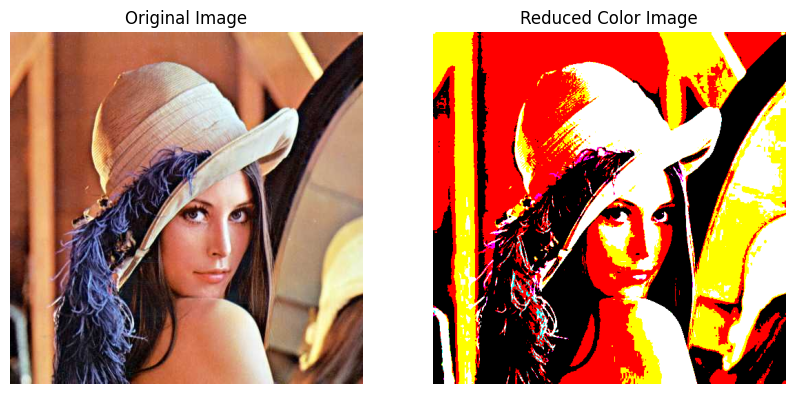

In [15]:
# 7 PEMETAAN 16 JUTA WARNA MENJADI 8 WARNA : HITAM, HIJAU, KUNING, BIRU, CYAN, MAGENTA DAN PUTIH

# Load image in color
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')  # Load as is (BGR)

# Step 1: Define color mapping rules
# Each of the colors (black, white, red, green, blue, yellow, cyan, magenta)
colors = {
    (0, 0, 0): [0, 0, 0],         # Black
    (0, 0, 1): [255, 0, 0],       # Blue
    (0, 1, 0): [0, 255, 0],       # Green
    (0, 1, 1): [0, 255, 255],     # Cyan
    (1, 0, 0): [255, 0, 0],       # Red (use for magenta)
    (1, 0, 1): [255, 0, 255],     # Magenta
    (1, 1, 0): [255, 255, 0],     # Yellow
    (1, 1, 1): [255, 255, 255]    # White
}

# Step 2: Create a function to map each pixel to the nearest 8-color set
def map_color(pixel):
    r, g, b = pixel[2], pixel[1], pixel[0]  # Get BGR components
    r_bin = 1 if r > 128 else 0
    g_bin = 1 if g > 128 else 0
    b_bin = 1 if b > 128 else 0
    return colors[(r_bin, g_bin, b_bin)]  # Return mapped color

# Step 3: Apply the mapping to the entire image
mapped_image = np.apply_along_axis(map_color, 2, image)

# Step 4: Tampilkan original image dan modification image
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

# Display modified image (reduced color image)
plt.subplot(122), plt.imshow(mapped_image)
plt.title('Reduced Color Image'), plt.axis('off')

plt.show()


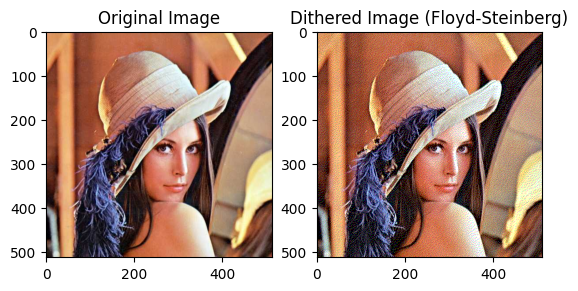

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in RGB format
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg', cv.IMREAD_COLOR)  # Load as is (BGR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert to RGB for easier manipulation

# Convert to float32 for dithering calculations
image = image.astype(np.float32)

# Get the dimensions of the image
height, width, _ = image.shape  # Note the addition of the third dimension (for RGB channels)

# Floyd-Steinberg dithering applied to each color channel
for y in range(height):
    for x in range(width):
        for channel in range(3):  # Loop through R, G, and B channels
            old_pixel = image[y, x, channel]
            new_pixel = 255 if old_pixel > 128 else 0  # Threshold for binary dithering
            image[y, x, channel] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < width:
                image[y, x + 1, channel] += error * 7 / 16
            if x - 1 >= 0 and y + 1 < height:
                image[y + 1, x - 1, channel] += error * 3 / 16
            if y + 1 < height:
                image[y + 1, x, channel] += error * 5 / 16
            if x + 1 < width and y + 1 < height:
                image[y + 1, x + 1, channel] += error * 1 / 16

# Clip the values to be in the proper range (0-255)
image = np.clip(image, 0, 255).astype(np.uint8)

# Save or display the dithered image
# cv.imwrite('/content/drive/MyDrive/PCVK/Images/lena_dithered_rgb.jpg', cv.cvtColor(image, cv.COLOR_RGB2BGR))

# Display the original and dithered images side by side
plt.subplot(1, 2, 1)
plt.imshow(cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')[..., ::-1])  # Display original image (BGR to RGB)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image)  # Display dithered image
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()


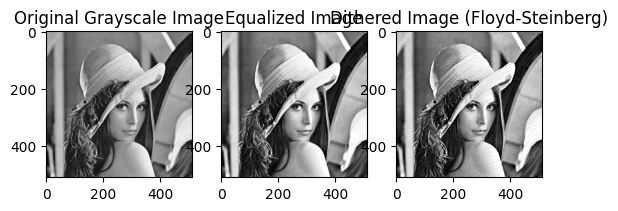

False

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image and convert to grayscale
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Display original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')

# 2. Apply Histogram Equalization
equalized_image = cv.equalizeHist(image)

# Display equalized image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

# 3. Floyd-Steinberg Dithering
# Convert to float32 for dithering calculations
image_dithered = equalized_image.astype(np.float32)

# Get the dimensions of the image
height, width = image_dithered.shape

# Apply Floyd-Steinberg dithering
for y in range(height):
    for x in range(width):
        old_pixel = image_dithered[y, x]
        new_pixel = 255 if old_pixel > 128 else 0  # Threshold for binary dithering
        image_dithered[y, x] = new_pixel
        error = old_pixel - new_pixel

        if x + 1 < width:
            image_dithered[y, x + 1] += error * 7 / 16
        if x - 1 >= 0 and y + 1 < height:
            image_dithered[y + 1, x - 1] += error * 3 / 16
        if y + 1 < height:
            image_dithered[y + 1, x] += error * 5 / 16
        if x + 1 < width and y + 1 < height:
            image_dithered[y + 1, x + 1] += error * 1 / 16

# Clip the values to be in the proper range (0-255)
image_dithered = np.clip(image_dithered, 0, 255).astype(np.uint8)

# Display dithered image
plt.subplot(1, 3, 3)
plt.imshow(image_dithered, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()

# Save the dithered image
cv.imwrite('/content/drive/MyDrive/PCVK/Images/lena_lc_dithered.jpg', image_dithered)
